In [ ]:
HomeTeam: The team playing at home

• AwayTeam: The team playing away

• FTHG: The goals scored by the home team at full time

• FTAG: The goals scored by the away team at full time

• FTR: Full time result (This is what you are predicting)

• HTHG: The goals scored by the home team at half time

• HTAG: The goals scored by the away team at half time

• HTR: The result at half time

• Referee: The name of the referee oﬃciating the match

• HS: Total number of shots on goal by the home team

• AS: Total number of shots on goal by the away team

• HST: Total number of shots on target by the home team

• AST: Total number of shots on target by the away team

• HF: Total number of fouls committed by the home team

• AF: Total number of fouls committed by the away team

• HC: Total number of corners by the home team

• AC: Total number of corners by the away team

• HY: Total number of yellow cards received by the home team

• AY: Total number of yellow cards received by the away team

• HR: Total number of red cards received by the home team

• AR: Total number of red cards received by the away team

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
train_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\AppData\\Desktop\\DATA ANALYSIS\\EPL HISTORICAL  DATA\\epl-training.csv")

In [9]:
train_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/2000,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/2000,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/2000,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/2000,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [14]:
train_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\AppData\\Desktop\\DATA ANALYSIS\\EPL HISTORICAL  DATA\\epl-training.csv")

train_df = train_data.drop(columns = ['FTR'])
print(train_df)


            Date          HomeTeam       AwayTeam  FTHG  FTAG  HTHG  HTAG HTR  \
0     19/08/2000          Charlton       Man City   4.0   0.0   2.0   0.0   H   
1     19/08/2000           Chelsea       West Ham   4.0   2.0   1.0   0.0   H   
2     19/08/2000          Coventry  Middlesbrough   1.0   3.0   1.0   1.0   D   
3     19/08/2000             Derby    Southampton   2.0   2.0   1.0   2.0   A   
4     19/08/2000             Leeds        Everton   2.0   0.0   2.0   0.0   H   
...          ...               ...            ...   ...   ...   ...   ...  ..   
9216  19/05/2024    Crystal Palace    Aston Villa   5.0   0.0   2.0   0.0   H   
9217  19/05/2024         Liverpool         Wolves   2.0   0.0   2.0   0.0   H   
9218  19/05/2024             Luton         Fulham   2.0   4.0   1.0   2.0   A   
9219  19/05/2024          Man City       West Ham   3.0   1.0   2.0   1.0   H   
9220  19/05/2024  Sheffield United      Tottenham   0.0   3.0   0.0   1.0   A   

               Referee    H

In [11]:
test_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\AppData\\Desktop\\DATA ANALYSIS\\EPL HISTORICAL  DATA\\epl-test.csv")

In [13]:
test_data.head()

,Date,HomeTeam,AwayTeam
0,01-Feb-25,AFC Bournemouth,Liverpool
1,01-Feb-25,Arsenal,Man City
2,01-Feb-25,Brentford,Spurs
3,01-Feb-25,Chelsea,West Ham
4,01-Feb-25,Everton,Leicester City


In [15]:
sample_data = pd.read_csv("C:\\Users\\hp\\OneDrive\\AppData\\Desktop\\DATA ANALYSIS\\EPL HISTORICAL  DATA\\sample-submission.csv")

In [17]:
sample_data.head()

,Date,HomeTeam,AwayTeam,FTR
0,01-Feb-25,AFC Bournemouth,Liverpool,H
1,01-Feb-25,Arsenal,Man City,A
2,01-Feb-25,Brentford,Spurs,D
3,01-Feb-25,Chelsea,West Ham,H
4,01-Feb-25,Everton,Leicester City,A


In [18]:
train_df.isnull().sum()

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
HTHG        1
HTAG        1
HTR         1
Referee     1
HS          1
AS          1
HST         1
AST         1
HC          1
AC          1
HF          1
AF          1
HY          1
AY          1
HR          1
AR          1
dtype: int64

In [19]:
train_df = train_df.dropna()

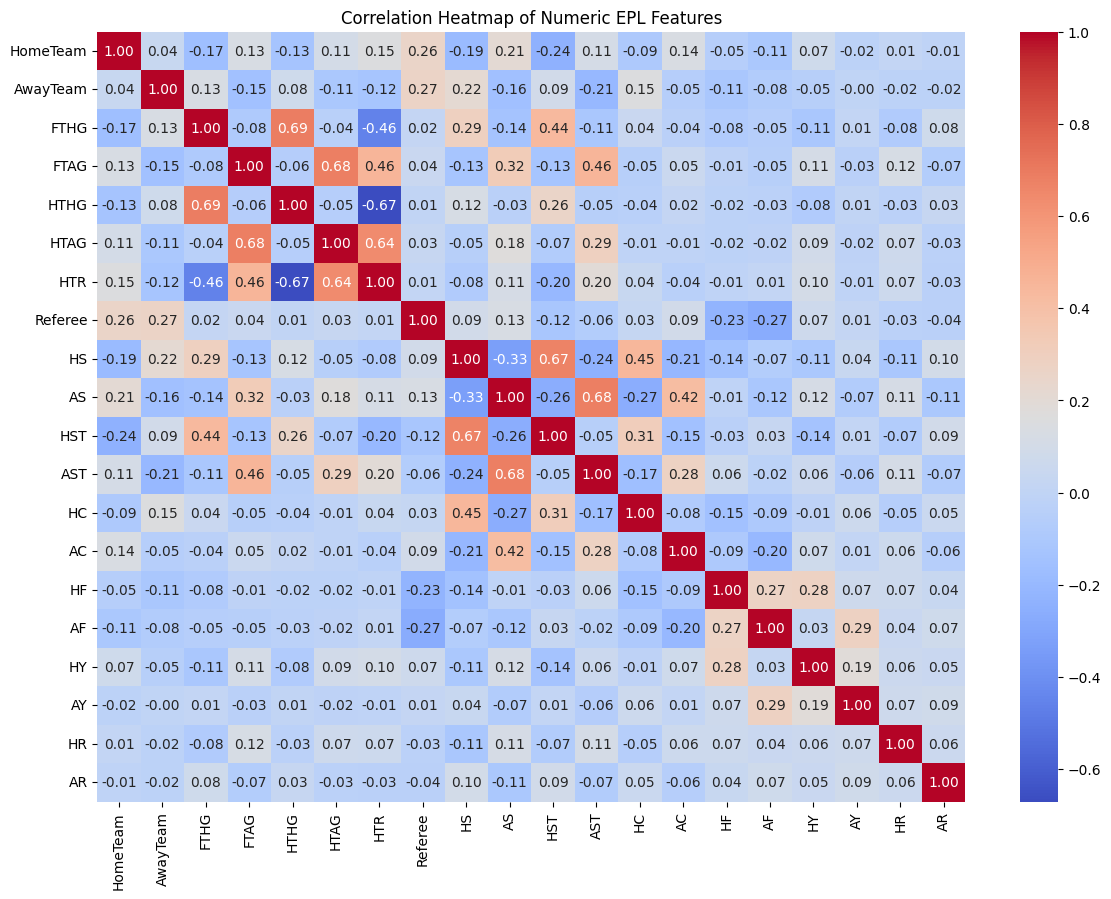

In [23]:
#Correlation Heatmap of Numeric EPL Features

train_df_numeric = train_df.select_dtypes(include=[float, int])
plt.figure(figsize=(14, 10))
sns.heatmap(train_df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric EPL Features")
plt.show()

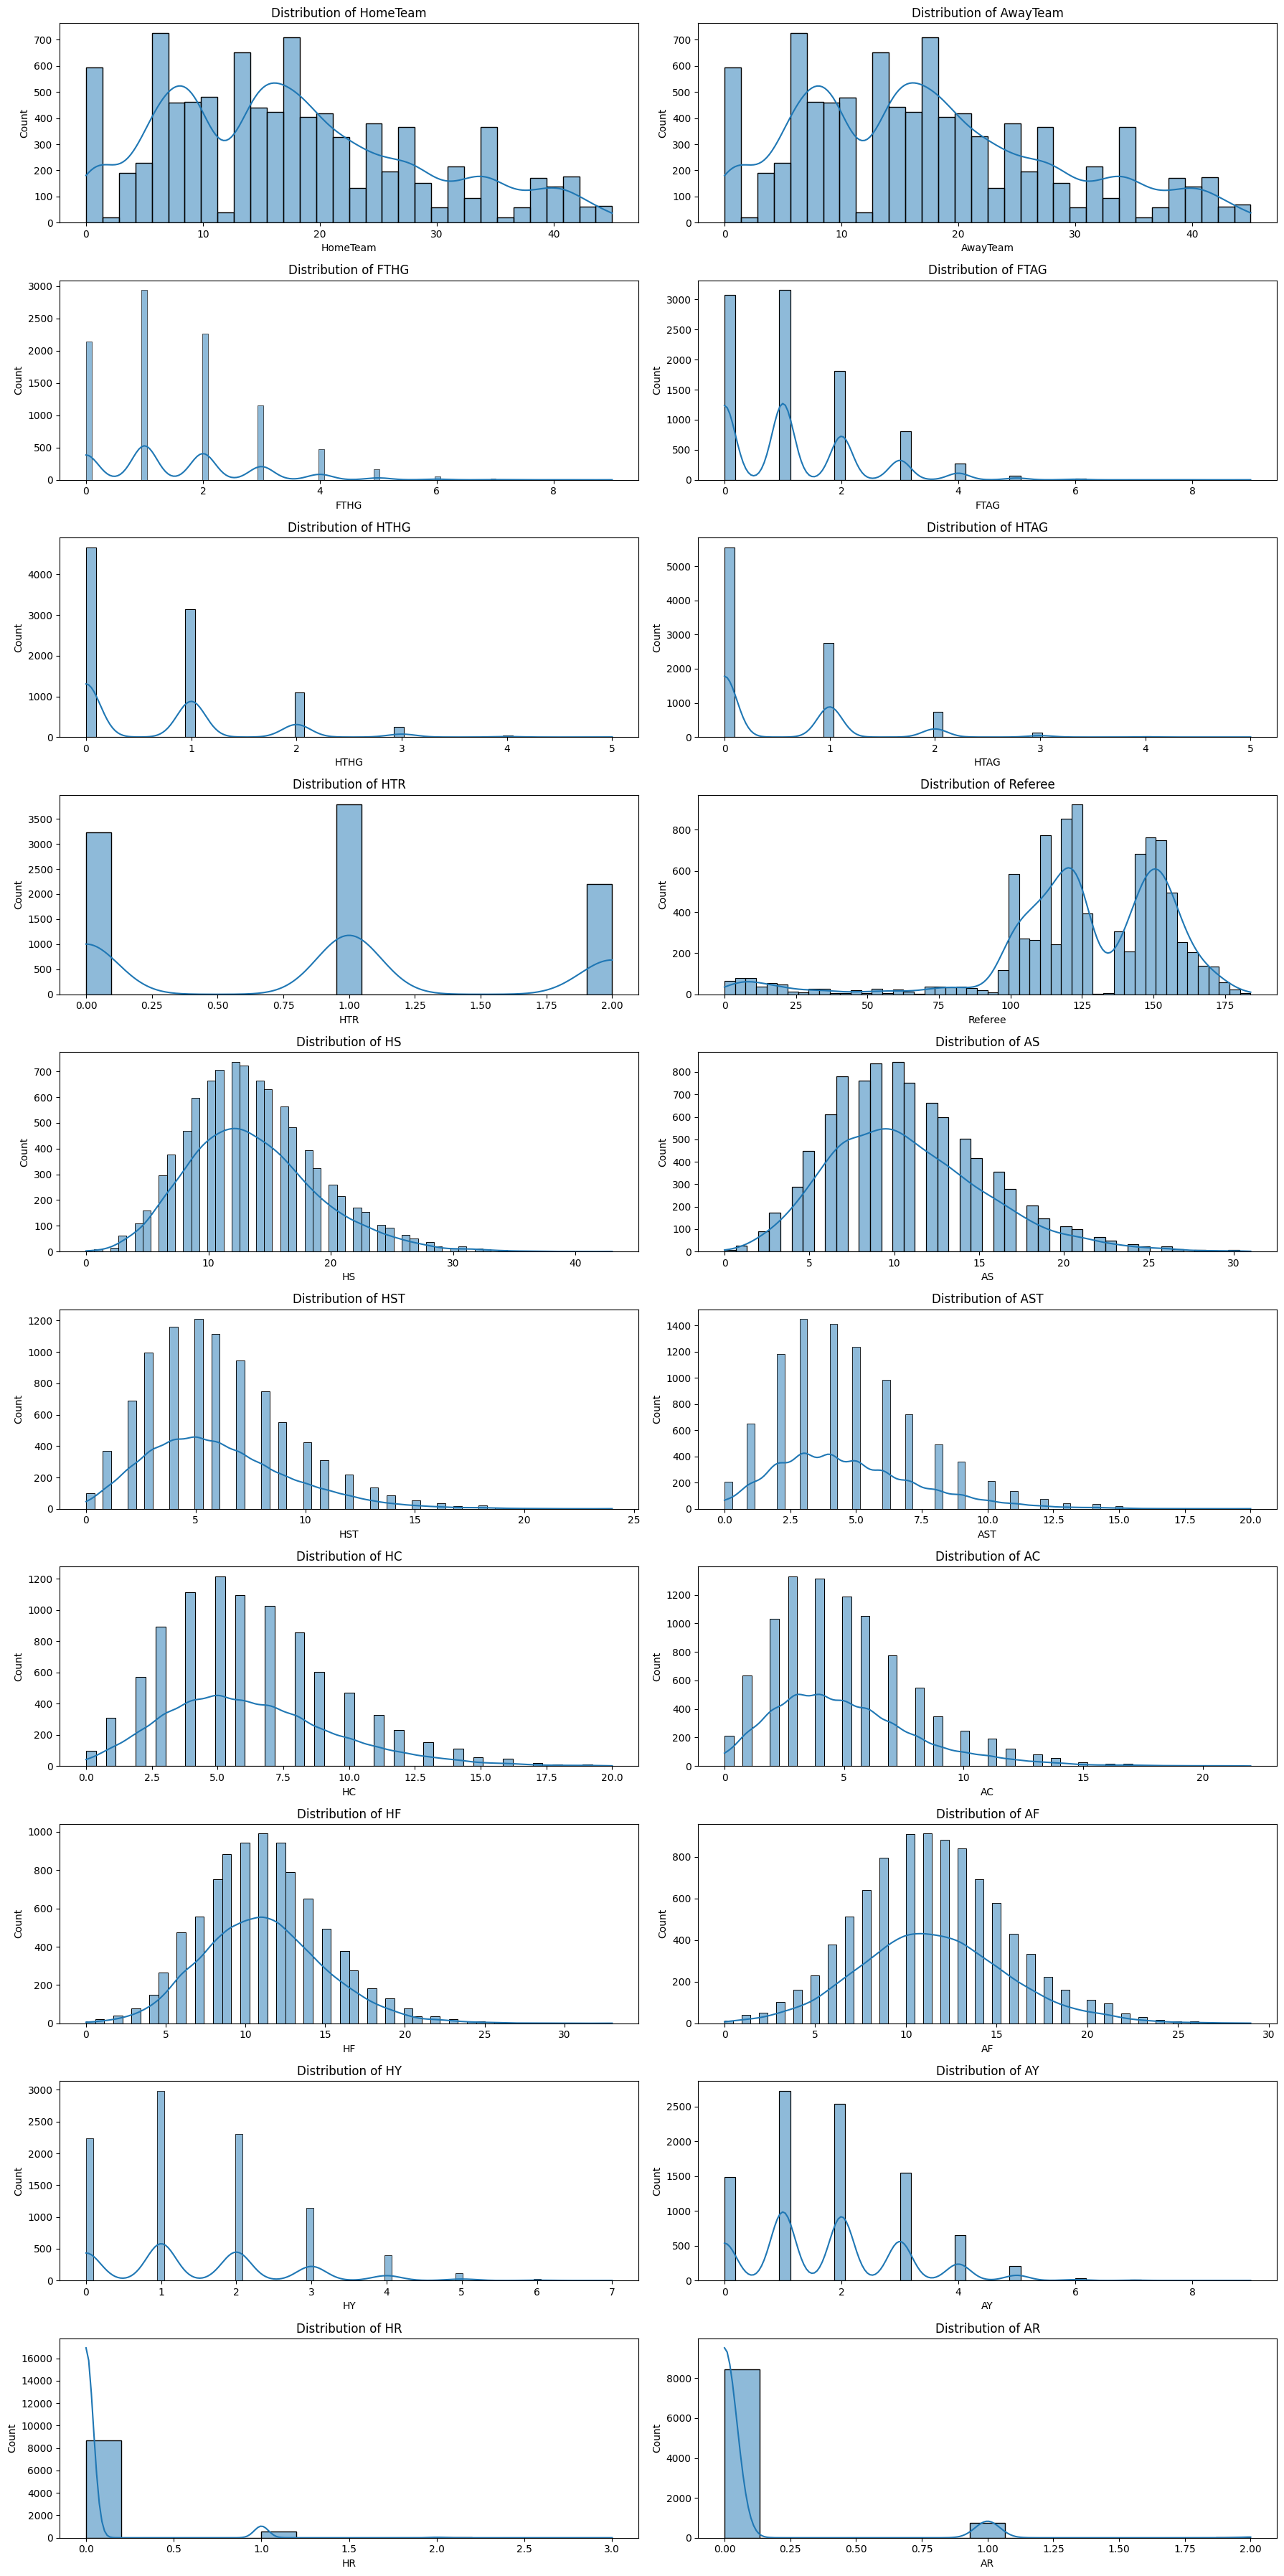

In [24]:
key_features = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR',
       'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY',
       'HR', 'AR']
plt.figure(figsize=(18, 36))
for i, feature in enumerate(key_features, 1):
    plt.subplot(10, 2, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

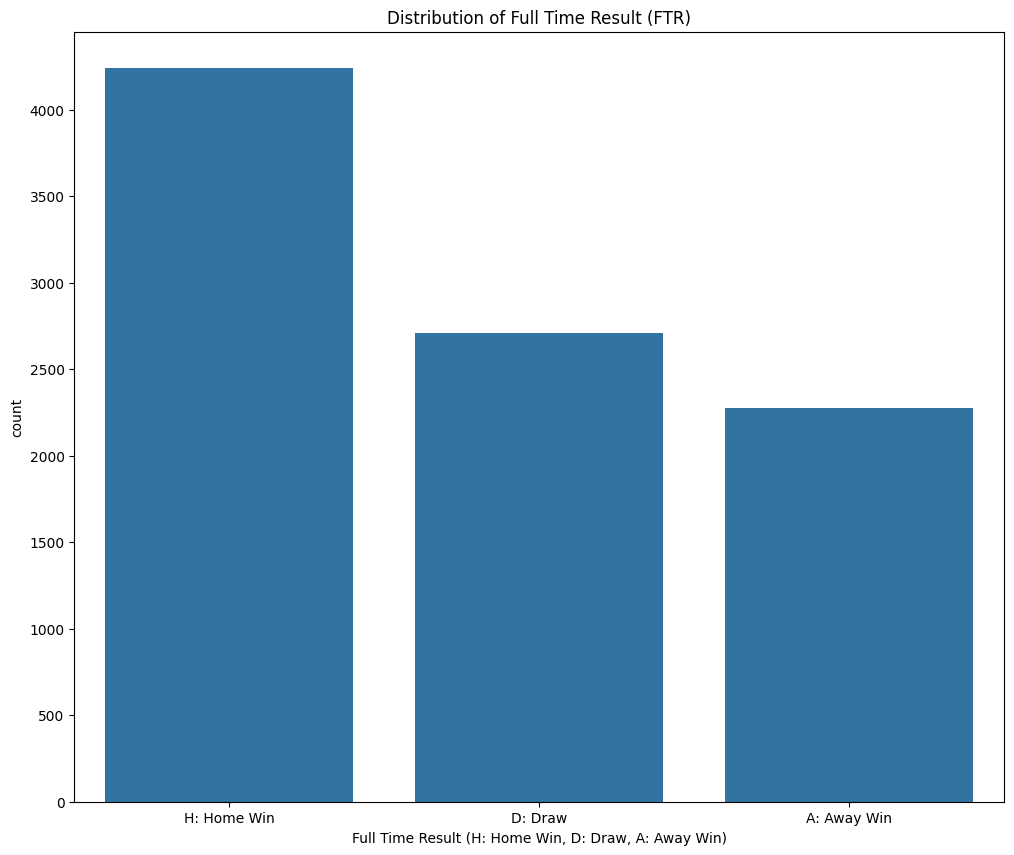

In [33]:
plt.figure(figsize=(12, 10))
sns.countplot(x=label_train_df['FTR'])
plt.title("Distribution of Full Time Result (FTR)")
plt.xlabel("Full Time Result (H: Home Win, D: Draw, A: Away Win)")
plt.xticks(ticks=[0, 1, 2], labels=['H: Home Win', 'D: Draw', 'A: Away Win'])

plt.show()


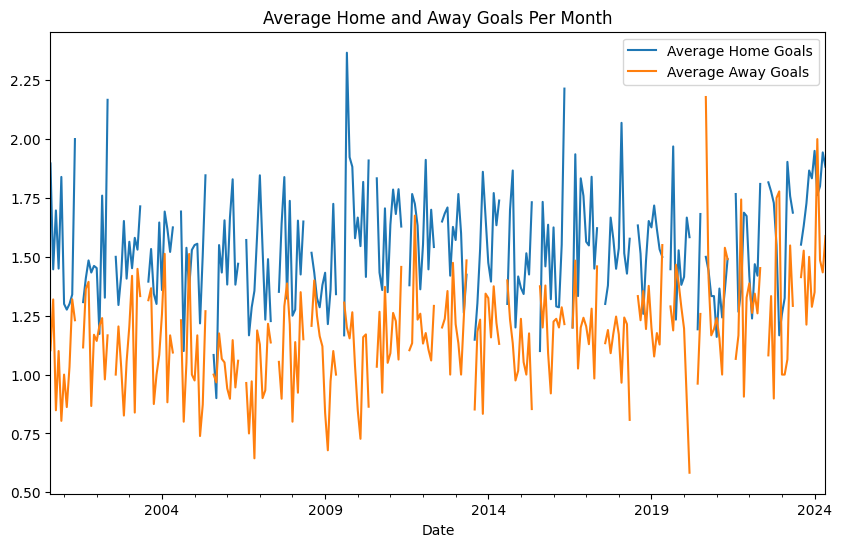

In [34]:
# 1. Average Home and Away Goals Per Month
plt.figure(figsize=(10, 6))
train_df['FTHG'].resample('ME').mean().plot(label='Average Home Goals')
train_df['FTAG'].resample('ME').mean().plot(label='Average Away Goals')
plt.title('Average Home and Away Goals Per Month')
plt.legend()
plt.show()


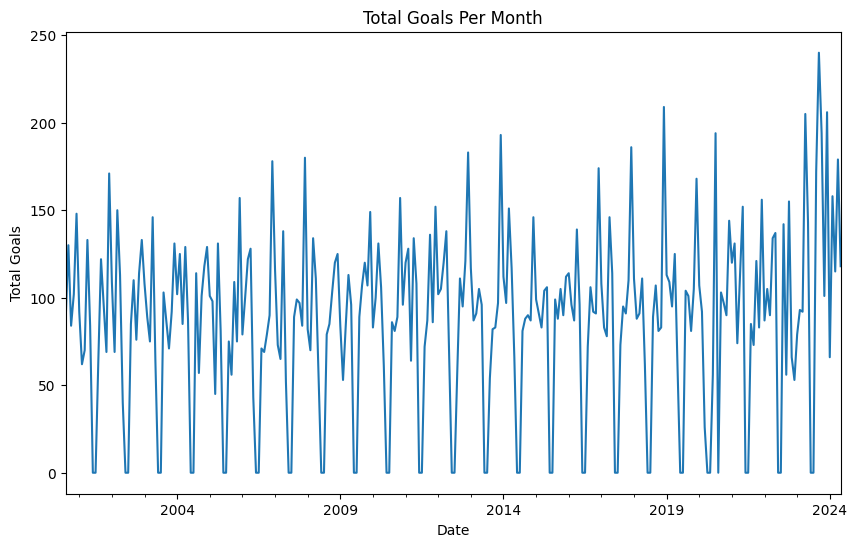

In [36]:
# 2. Total Goals Per Month (Home + Away)
plt.figure(figsize=(10, 6))
(train_df['FTHG'] + train_df['FTAG']).resample('ME').sum().plot()
plt.title('Total Goals Per Month')
plt.ylabel('Total Goals')
plt.show()

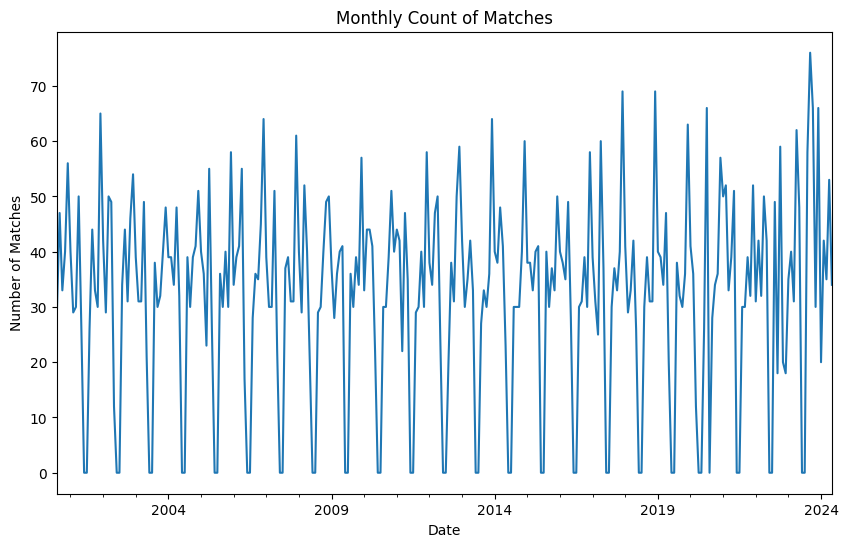

In [37]:
# 3. Monthly Count of Matches
plt.figure(figsize=(10, 6))
train_df.resample('ME').size().plot()
plt.title('Monthly Count of Matches')
plt.ylabel('Number of Matches')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

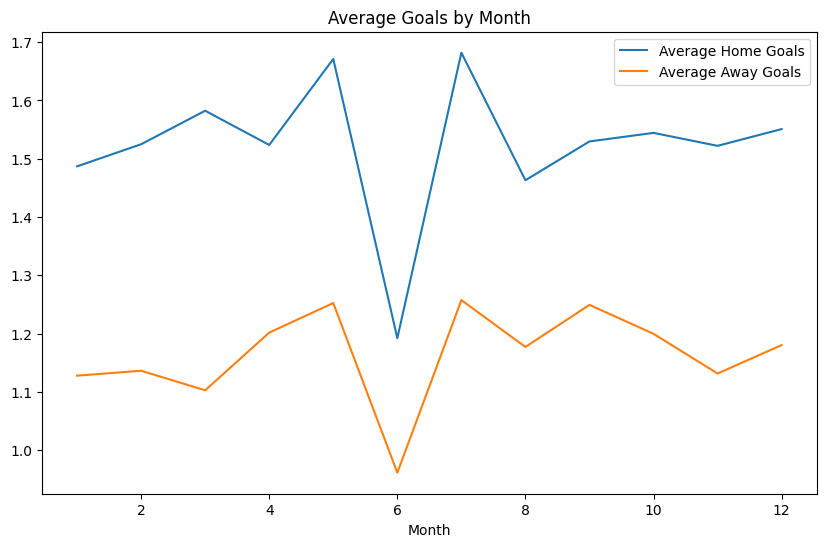

In [39]:
# Average Goals by Month  
# Monthly Analysis
plt.figure(figsize=(10, 6))
train_df['FTHG'].groupby(train_df.index.month).mean().plot(label='Average Home Goals')
train_df['FTAG'].groupby(train_df.index.month).mean().plot(label='Average Away Goals')
plt.title('Average Goals by Month')
plt.xlabel('Month')
plt.legend()
plt.show

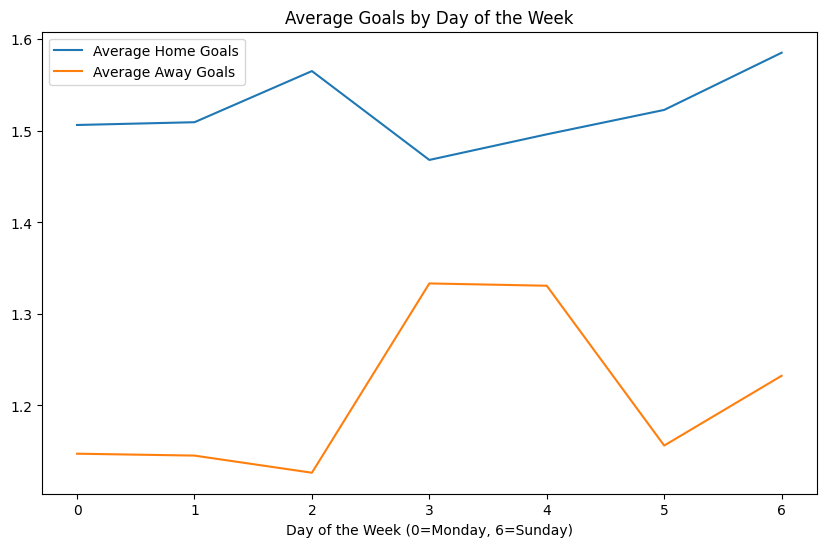

In [41]:
# Weekly Analysis
plt.figure(figsize=(10, 6))
train_df['FTHG'].groupby(train_df.index.dayofweek).mean().plot(label='Average Home Goals')
train_df['FTAG'].groupby(train_df.index.dayofweek).mean().plot(label='Average Away Goals')
plt.title('Average Goals by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.legend()
plt.show()


In [63]:
train_data.nunique()

Date        2522
HomeTeam      46
AwayTeam      46
FTHG          10
FTAG          10
FTR            3
HTHG           6
HTAG           6
HTR            3
Referee      185
HS            40
AS            32
HST           24
AST           21
HC            21
AC            23
HF            30
AF            30
HY             8
AY            10
HR             4
AR             3
dtype: int64

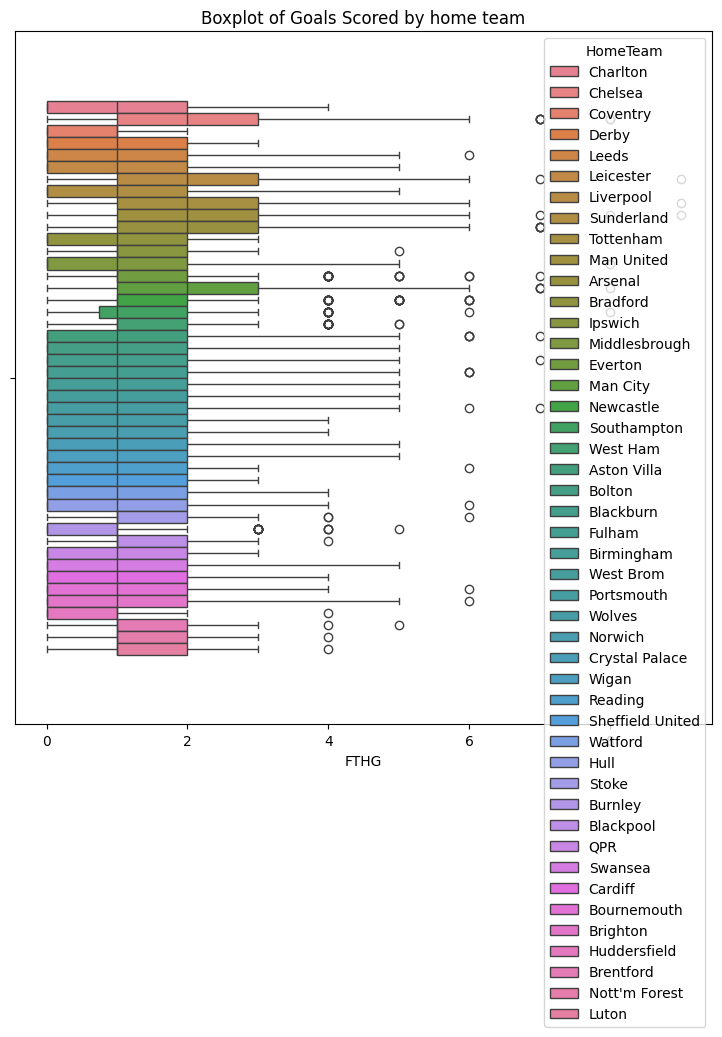

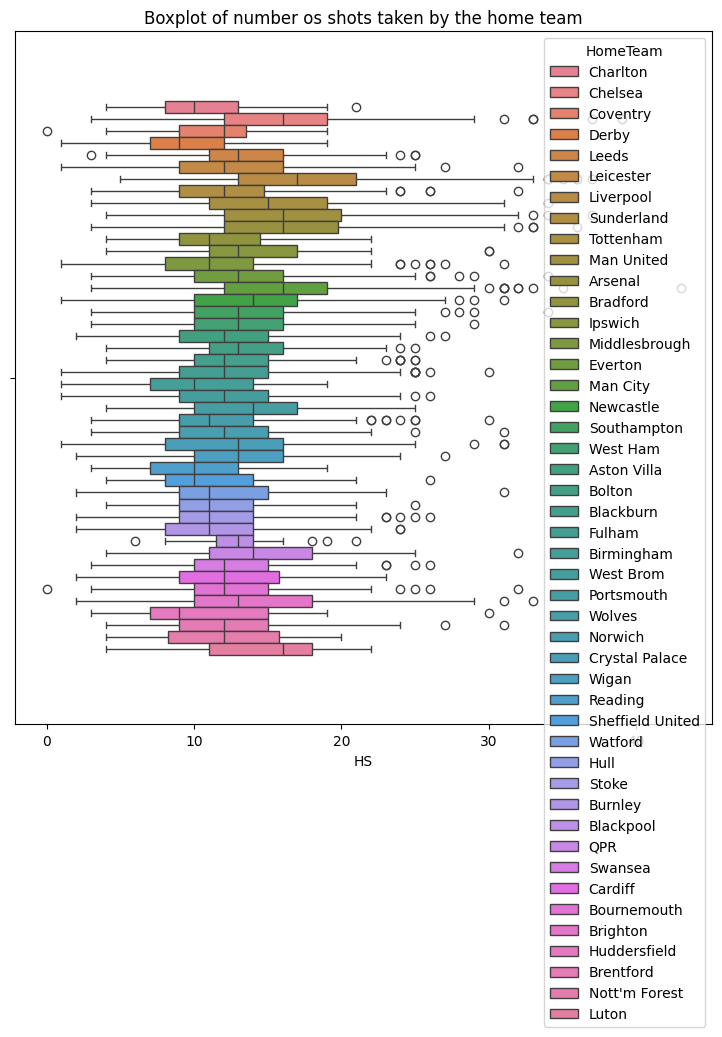

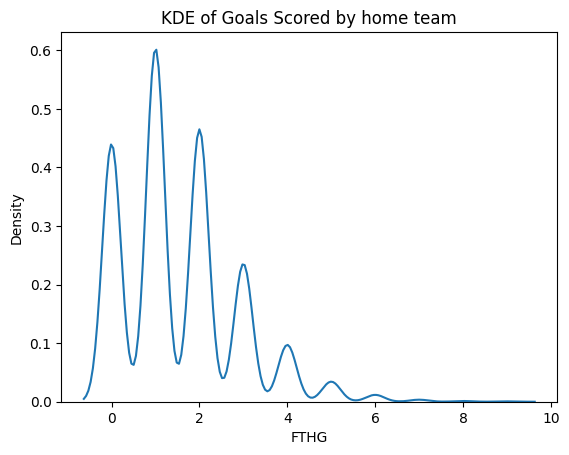

In [69]:
# Boxplot for goals scored (replace 'goals_scored' with the actual column name)
plt.figure(figsize = (9,9))
sns.boxplot(data=train_data , x='FTHG' ,hue= 'HomeTeam')
plt.title('Boxplot of Goals Scored by home team')
plt.show()

#boxplot for number of shots by he hometem
plt.figure(figsize = (9,9))
sns.boxplot(data=train_data ,x="HS" , hue= "HomeTeam")
plt.title('Boxplot of number os shots taken by the home team')
plt.show()

# KDE plot for goals scored by home team
sns.kdeplot(train_data['FTHG'])
plt.title('KDE of Goals Scored by home team')
plt.show()


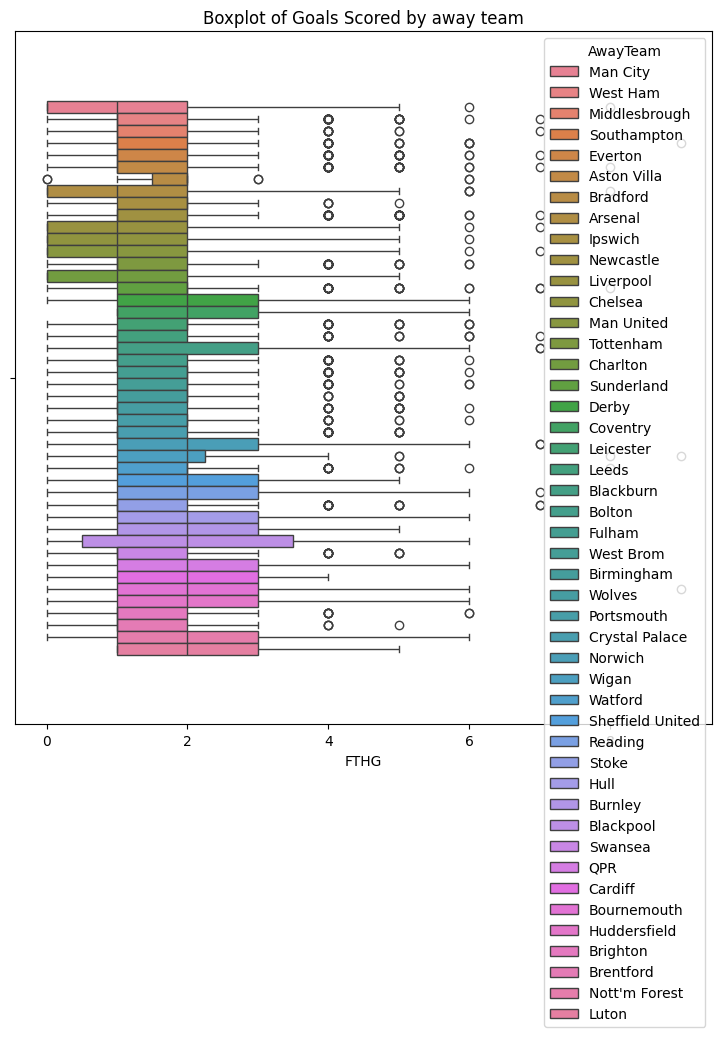

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


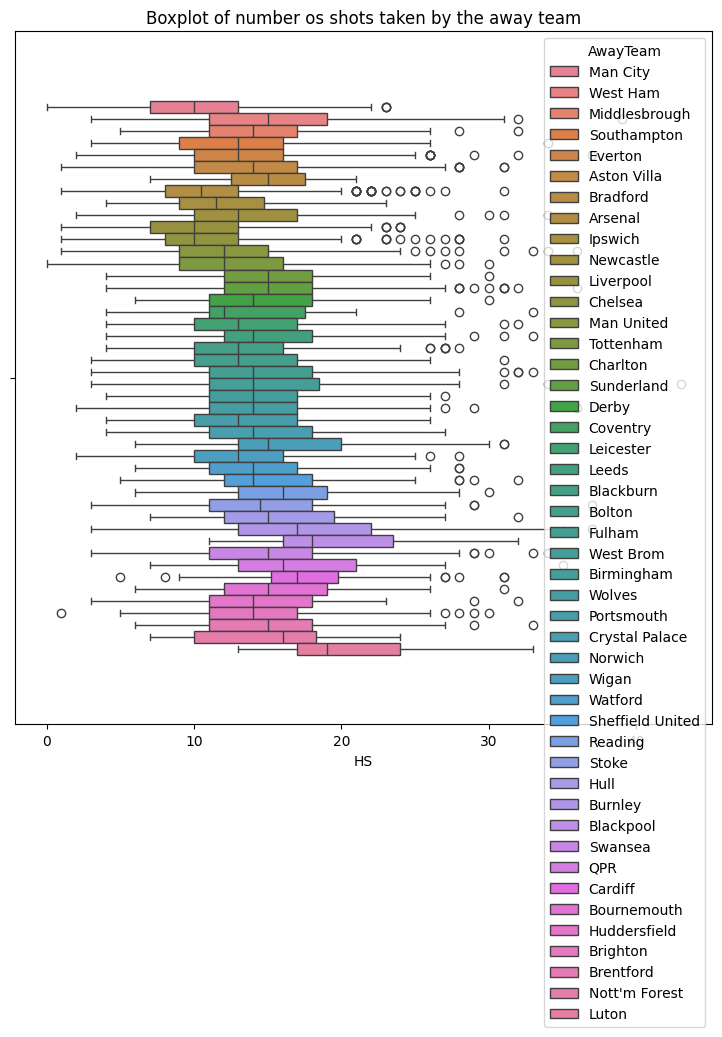

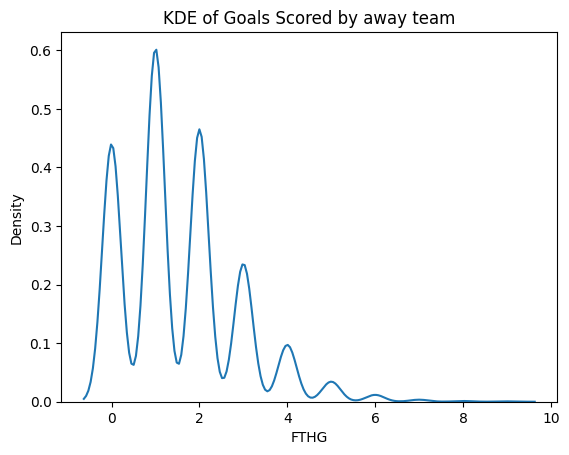

In [72]:
# Boxplot for goals scored by the away team
plt.figure(figsize = (9,9))
sns.boxplot(data=train_data , x='FTHG' ,hue= 'AwayTeam')
plt.title('Boxplot of Goals Scored by away team')
plt.show()

#boxplot for number of shots by the away team
plt.figure(figsize = (9,9))
sns.boxplot(data=train_data ,x="HS" , hue= "AwayTeam")
plt.title('Boxplot of number of shots taken by the away team')
plt.show()

# KDE plot for goals scored by away team
sns.kdeplot(train_data['FTHG'])
plt.title('KDE of Goals Scored by away team')
plt.show()


In [74]:
train_data.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,19/08/2000,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,Rob Harris,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,19/08/2000,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,19/08/2000,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,Barry Knight,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,19/08/2000,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,19/08/2000,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\hp\\OneDrive\\AppData\\Desktop\\DATA ANALYSIS\\EPL HISTORICAL  DATA\epl-training.csv')

# Check the first few rows to inspect the 'FTR' column
df.head()

# Create a mapping for FTR to numerical values
ftr_mapping = {'H': 1, 'D': 0, 'A': -1}

# Map the 'FTR' column to numerical values (Home Win = 1, Draw = 0, Away Win = -1)
df['FTR_numeric'] = df['FTR'].map(ftr_mapping)

# Check if the mapping was successful
df[['FTR', 'FTR_numeric']].head()


,FTR,FTR_numeric
0,H,1.0
1,H,1.0
2,A,-1.0
3,D,0.0
4,H,1.0


          Home Win      Draw  Away Win
Home Win  1.000000 -0.527787 -0.594505
Draw     -0.527787  1.000000 -0.368930
Away Win -0.594505 -0.368930  1.000000


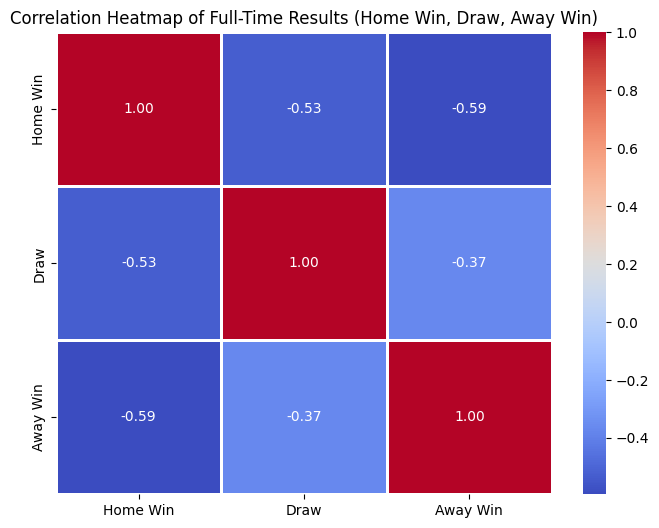

In [82]:
df['Home Win'] = (df['FTR'] == 'H').astype(int)
df['Draw'] = (df['FTR'] == 'D').astype(int)
df['Away Win'] = (df['FTR'] == 'A').astype(int)
correlation_matrix = df[['Home Win', 'Draw', 'Away Win']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation Heatmap of Full-Time Results (Home Win, Draw, Away Win)')
plt.show()



In [84]:
train_data= pd.read_csv('C:\\Users\\hp\\OneDrive\\AppData\\Desktop\\DATA ANALYSIS\\EPL HISTORICAL  DATA\\epl-training.csv')
train_data.head()
ftr_mapping = {'H': 1, 'D': 0, 'A': -1}
train_data['FTR_numeric'] = train_data['FTR'].map(ftr_mapping)
train_data = pd.get_dummies(df, columns=['HomeTeam', 'AwayTeam'], drop_first=True)
train_data.head()


,Date,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,...,AwayTeam_Southampton,AwayTeam_Stoke,AwayTeam_Sunderland,AwayTeam_Swansea,AwayTeam_Tottenham,AwayTeam_Watford,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wigan,AwayTeam_Wolves
0,19/08/2000,4.0,0.0,H,2.0,0.0,H,Rob Harris,17.0,8.0,...,False,False,False,False,False,False,False,False,False,False
1,19/08/2000,4.0,2.0,H,1.0,0.0,H,Graham Barber,17.0,12.0,...,False,False,False,False,False,False,False,True,False,False
2,19/08/2000,1.0,3.0,A,1.0,1.0,D,Barry Knight,6.0,16.0,...,False,False,False,False,False,False,False,False,False,False
3,19/08/2000,2.0,2.0,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,...,True,False,False,False,False,False,False,False,False,False
4,19/08/2000,2.0,0.0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,...,False,False,False,False,False,False,False,False,False,False


In [86]:
corr_matrix = train_data.corr()
ftr_team_corr = corr_matrix[['FTR_numeric']]
print(ftr_team_corr)
plt.figure(figsize=(12, 8))
sns.heatmap(ftr_team_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation Heatmap: FTR and Home/Away Teams')
plt.show()

ValueError: could not convert string to float: '19/08/2000'

In [92]:
team_performance = train_data.groupby('HomeTeam').sum().sort_values(ascending=False)

# Plotting the top 10 teams by wins
team_performance.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Teams by Wins')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


NameError: name 'by' is not defined